# Question 1:

In [173]:
# 1.1: Load data (Successful)

# Import pandas to read data
import pandas as pd

# Read the data using pd.read_csv() with relative path, keep high precision
df=pd.read_csv("./input_data.csv", header=None, float_precision='round_trip')

# row is 2207, col is 459
print(df.shape) # returned (2207, 459)

(2207, 459)


In [174]:
# 1.1 Continue (data wrangling)

print(df.isna().values.sum()) # returned 0, meaning no missing data

# Handling constant rows
constant_df=df[df.nunique(axis=1)==1]
df.drop(constant_df.index, inplace=True)
print(df.shape) # return (1806, 459)


# Transpose it such that every row is the vector, with columns corresponding to entries in the vector.
std_df=df.T
print(std_df.shape) # returned (459, 1806), transpose is successful

# Perform range standardization through elementwise functions (y_ij): (reuse my own code for asignment 3)
# use for loop to, where i is the column, j is values at new_df[col]
# using skelearn.preprocessing.StandardScaler also works
for col in std_df.columns:
    std_df[col]=(std_df[col]-std_df[col].min())/(std_df[col].max()-std_df[col].min())

# print("The range standardized features y_ij are:\n")
# print(std_df)



0
(1806, 459)
(459, 1806)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

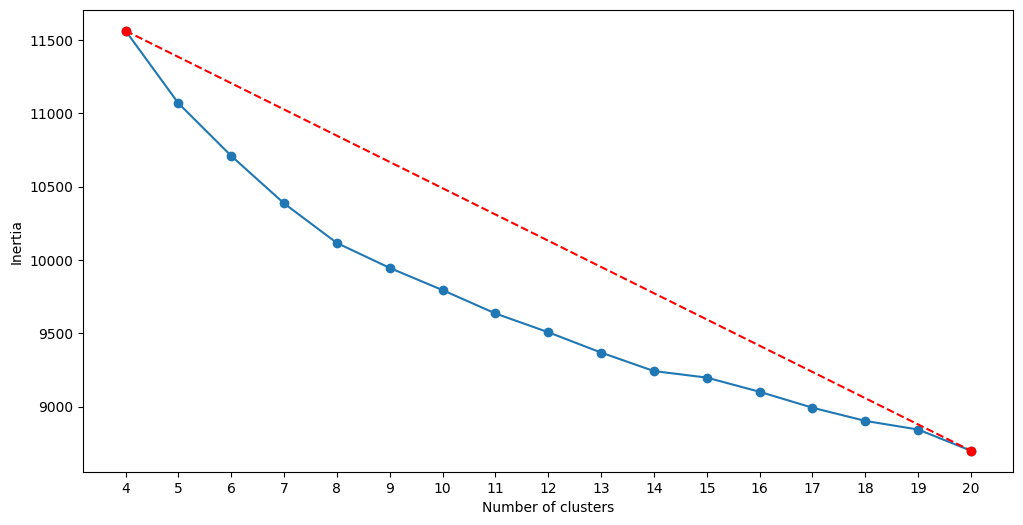

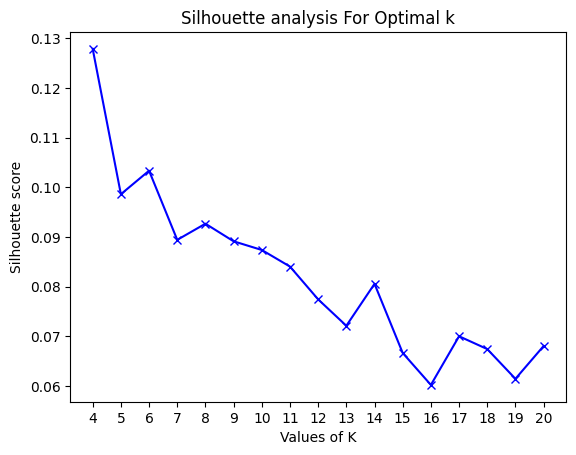

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



The score for 4-means clustering on regular data is:
-11566.694046210174

The inertria for 4-means clustering on regular data is:
11566.694046210172

The labels for 4-means clustering on regular data is:
[0 0 0 0 0 2 2 0 2 1 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 1 3 3 3 0 0 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1
 3 3 3 3 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 2 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 0 2 3 0 0 2 0 3 0 0 3
 0 2 2 2 2 0 0 2 2 2 2 0 2 0 0 2 2 3 1 3 1 1 1 1 1 1 3 3 3 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 3 0 0 0 3 3 3
 3 3 3 3 3 1 3 3 3 3 0 3 0 0 0 1 3 3 3 3 0 3 

In [175]:
# 1.2: Perform K-means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# EXTRA: determine how to do get the best # cluster using elbow and Silhoutette

# Finding optimal number of clusters
range_clusters=np.arange(4,21)

# use for loop to  run different K-means model with different numbers of cluster, find the inertia and silhouette coefficient
# Inertia is the sum of distances of samples to their cloeses cluster center
# Silhouette coefficient silhouette score: measures of how similar a data point is within cluster compared to other clusters)
SSE_list=[]
silhouette_avg = []

for num_cluster in range_clusters:
    kmeans = KMeans(n_clusters = num_cluster, init='k-means++')
    kmeans.fit(std_df)
    # Append the metrics to lists
    SSE_list.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(std_df, kmeans.labels_))

# Finding the inertia that has the longest distance from the line drawn from the first point to the last point
frame = pd.DataFrame({'Cluster':range_clusters, 'SSE':SSE_list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(range_clusters)
plt.ylabel('Inertia')
plt.plot([4,20], [SSE_list[0], SSE_list[-1]], 'bo',linestyle="--", color='red')
plt.show()
# Interpretation is 4, confirm with silhouette analysis

# Silhoutette Analysis
plt.plot(range_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range_clusters)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Since 4 has the maximum silhouette score, the optimal k of 4 is verified

# Perform K-means clustering (actually)
kmeans=KMeans(n_clusters=4)
# fit the k-means model (fit OR fit_predict)
kmeans.fit_predict(std_df)

# Get the score
print("\nThe score for 4-means clustering on regular data is:")
print(kmeans.score(std_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on regular data is:")
print(kmeans.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on regular data is:")
print(kmeans.labels_) # returned an array that shows which cluster each observation is in


In [176]:
# 1.3 generate a n(459)*n(459) matrix, denoted M

# each entry m_ij is 1 if observations i and j are in the same cluster and 0 if they are in different clusters.


# WAY 1
# if  i and j are same cluster--> 1 else 0
M=np.zeros((std_df.shape[0], std_df.shape[0]))
print(M.shape) # returned (459, 459)

print(kmeans.labels_)
print(kmeans.labels_[1])

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if kmeans.labels_[i]==kmeans.labels_[j]:
            M[i][j]=1

print(M)

"""
# WAY 2
# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels
for i in range(459):
    if i==0:
        m=kmeans.labels_
    else:
        m=np.vstack((m, kmeans.labels_))

print(m.shape)

# Unsure (NEED CHECK)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if m[i][j]==m[j][i]:
            M[i][j]=1

print(M)
"""


(459, 459)
[0 0 0 0 0 2 2 0 2 1 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 1 3 3 3 0 0 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1
 3 3 3 3 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 2 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 0 2 3 0 0 2 0 3 0 0 3
 0 2 2 2 2 0 0 2 2 2 2 0 2 0 0 2 2 3 1 3 1 1 1 1 1 1 3 3 3 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 3 0 0 0 3 3 3
 3 3 3 3 3 1 3 3 3 3 0 3 0 0 0 1 3 3 3 3 0 3 0 0 0 3 0 0 0 0 0 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
0
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

"\n# WAY 2\n# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels\nfor i in range(459):\n    if i==0:\n        m=kmeans.labels_\n    else:\n        m=np.vstack((m, kmeans.labels_))\n\nprint(m.shape)\n\n# Unsure (NEED CHECK)\nfor i in range(M.shape[0]):\n    for j in range(M.shape[1]):\n        if m[i][j]==m[j][i]:\n            M[i][j]=1\n\nprint(M)\n"

In [177]:
# 1.4 PCA

# import PCA from sklearn library in python
from sklearn.decomposition import PCA

print(std_df.shape) # 459*1806

# for loop (TEST)
# for i in range(std_df.shape[0]):
#     pca=PCA(n_components=3)
#     pca_fit=pca.fit(std_df[i])

#     print(pca_fit.components_)
#     print(pca_fit.n_features_)  

pca=PCA(n_components=3) # with n_components=3
# DO fit transform on PCA
reduced_df=pca.fit_transform(std_df)

print(reduced_df)
print(reduced_df.shape) # returned (459, 3) (Successful)


(459, 1806)
[[ 4.74552794e-01  1.01833578e-03 -6.31156975e-01]
 [ 9.52198171e-01  1.16564675e+00  4.15443132e-01]
 [ 5.98436117e-01  9.29725588e-01  3.14533000e-02]
 ...
 [-2.34711288e+00 -2.85385396e+00  7.63935699e-01]
 [-1.34202340e+00 -3.44538238e+00 -2.12428549e+00]
 [-1.03579551e+00 -3.55412625e+00 -1.76828319e+00]]
(459, 3)


In [180]:
# 1.5 Do k-means clustering on the resulting reduced-dimensional data

# Perform K-means clustering (actually)
kmeans_reduce=KMeans(n_clusters=4)
# fit the k-means model (fit or fit_predict)
reduced=kmeans_reduce.fit(reduced_df)

# Get the score
print("\nThe score for 4-means clustering on reduced-dimensional data is:")
print(reduced.score(reduced_df)) # returned -2250.2534290496333

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on reduced-dimensional data is:")
print(reduced.inertia_) # returned 2250.2534290496333

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on reduced-dimensional data is:")
print(reduced.labels_) # returned an array that shows which cluster each observation is in

print(reduced.labels_.shape) # returned (459,1), just like before

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



The score for 4-means clustering on reduced-dimensional data is:
-2250.2534290496333

The inertria for 4-means clustering on reduced-dimensional data is:
2250.2534290496333

The labels for 4-means clustering on reduced-dimensional data is:
[0 0 0 2 0 2 2 0 2 1 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 0
 0 1 0 0 0 0 0 0 0 1 3 1 1 0 0 2 2 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 3 2 2 2 0 3 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1
 0 3 3 3 0 0 3 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 2 2 0 0 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 0 2 2 0 3 0 0 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 1 1 1 1 1 3 3 3 0 3 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 3 0 0 0 0 0 0 0 1 0 0 3 0 0 0 3 3 3
 3 3 3 3 

In [172]:
# 1.6 Create another n × n matrix P (but using the reduced-dimensional data)

# if  i and j are same cluster--> 1 else 0
P=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))
print(P.shape) # returned (459, 459)


# WAY 1
print(kmeans_reduce.labels_)
print(kmeans_reduce.labels_[1])

for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if kmeans_reduce.labels_[i]==kmeans_reduce.labels_[j]:
            P[i][j]=1.0

print(P)

"""
# Way 2
# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels
for i in range(459):
    if i==0:
        p=kmeans_reduce.labels_
    else:
        p=np.vstack((p, kmeans_reduce.labels_))

# print(m.shape)

# Unsure (NEED CHECK)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if p[i][j]==p[j][i]:
            P[i][j]=1

print(P)
"""

print(P.shape)

(459, 459)
[3 3 3 0 3 0 0 3 0 1 3 3 3 3 3 3 3 3 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 3 3
 3 1 3 3 3 3 3 3 3 1 2 1 1 3 3 0 0 3 3 3 0 0 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 0 3 2 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1
 3 2 2 2 3 3 2 0 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 0 0 3 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 3 2 3 3 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 2 2 2 3 2 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 2 3 3 3 3 3 3 3 1 3 3 2 3 3 3 2 2 2
 2 2 2 2 2 1 2 2 2 2 3 2 3 3 3 1 2 2 2 2 3 2 3 3 3 2 3 3 3 3 3 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
3
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

In [184]:
# 1.7 Code to answer the questions

# Compare M and P

print("The total elements that M and P each has: "+ str(M.shape[0]*M.shape[0]))

print("The number of entries that M and P share together are: "+str(np.sum(M == P)))

The total elements that M and P each has: 210681
The number of entries that M and P share together are: 190755


# 1.7 Answers (Update)

* Q1: How many entries are the same between M and P? 
* A: 190755 entries are the same between M and P

* Q2: In other words, how did performing PCA affect the structure of the data? 
* A: PCA reduce the dimensionality of the standardized dataset, from 459*459 to 459*3 to prevent the curse of dimensionality, which make data sparse as dimensionality increases

# Question 2

In [145]:
# 2.1 Perform k-means on the full-dimensional data ten times

# using k clusters each time but ten different sets of initial values for cluster centroids

# Perform K-means clustering (actually), with 10 sets of initial values for cluster centroids
kmeans_10=KMeans(n_clusters=4, n_init=10)
# fit the k-means model (fit or fit_predict)
kmeans_10.fit_transform(std_df)

# check whether the cluster centers are the same
print(kmeans_10.cluster_centers_) # returned unique values

# Get the score
print("\nThe score for 4-means clustering on reduced-dimensional data is:")
print(kmeans_10.score(std_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on reduced-dimensional data is:")
print(kmeans_10.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on reduced-dimensional data is:")
print(kmeans_10.labels_) # returned an array that shows which cluster each observation is in

print(kmeans_10.labels_.shape) # returned (459,1), just like before

[[0.0888799  0.26930824 0.26705586 ... 0.28286137 0.46073718 0.24982328]
 [0.08662962 0.09962002 0.66776316 ... 0.1698477  0.11554276 0.22903751]
 [0.0735817  0.12824537 0.48544759 ... 0.18624233 0.16122159 0.25025225]
 [0.08161659 0.05244916 0.61523109 ... 0.32254363 0.15615809 0.1120743 ]]

The score for 4-means clustering on reduced-dimensional data is:
-12608.29204998733

The inertria for 4-means clustering on reduced-dimensional data is:
12608.29204998733

The labels for 4-means clustering on reduced-dimensional data is:
[2 2 2 2 2 1 1 2 1 0 2 2 2 2 3 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 0 3 3 3 2 2 2 2 0 3 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 3 3 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 0
 3 3 3 3 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 1 1 1 0 3 0 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 3